In [1]:
# impoting the data 
import pandas as pd
df=pd.read_csv('C:\\Users\\jalli\\python\\Cardiotocographic.csv')
df.head()
pd.set_option('display.max_columns',14)
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [2]:
# filling the  null cells with zero(0)
print(df.dtypes)
df.shape
df.isnull().sum()
df[48:53][df.columns[[0,1,2]]]
#        LB        AC        FM
# 48  122.0  0.003003  0.006006
# 49  158.0  0.005004  0.000000
# 50    NaN       NaN  0.000000
# 51  156.0  0.000000  0.000000
# 52  156.0  0.000000  0.000000
# you can see 50 row has null values replace them with 0
df.fillna(0,inplace=True)
df[49:53][df.columns[[0,1,2]]]
#      LB        AC   FM
# 49  158.0  0.005004  0.0
# 50    0.0  0.000000  0.0
# 51  156.0  0.000000  0.0
# 52  156.0  0.000000  0.0


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


,LB,AC,FM
49,158.0,0.005004,0.0
50,0.0,0.000000,0.0
51,156.0,0.000000,0.0
52,156.0,0.000000,0.0


In [14]:
# chinging outliers

# The Variables like 'AC',"FM",'UC'."DL",'DS',"DP",'ASTV',"MSTV",'ALTV',"MLTV",'Width','Tendency','NSP' 
# contain out layers
# replacesing this outliers with median()

import numpy as np 

for i in df:
    # Calculate z-scores for the column
    z_scores = np.abs((df[i] - df[i].mean()) / df[i].std())
    # Define the threshold for outliers (e.g., z > 3 or z < -3)
    threshold = 3
    # Identify outliers
    outliers = df[i][z_scores > threshold ].index
    list(outliers)
    # Treat outliers (e.g., replace with NaN)
    df.loc[z_scores > threshold, i] = np.nan
    df.loc[z_scores <= -3, i] = np.nan
    df[i].fillna(df[i].median(), inplace=True)



In [15]:

# 2.	Statistical Summary
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2.126000e+03,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.263990,0.002942,0.002419,0.004341,0.001583,2.429936e-09,0.000027,46.993632,1.262124,6.515430,7.739458,70.306011,0.316067,1.289752
std,9.743481,0.003557,0.005844,0.002911,0.002490,1.455198e-07,0.000166,17.157976,0.725798,12.591167,4.851600,38.615609,0.607922,0.622659
min,106.000000,-0.000185,-0.005106,-0.000132,-0.000124,-1.790000e-06,-0.000045,11.799846,0.200000,-1.043619,-0.200788,3.000000,-1.006614,0.000000
25%,126.000000,0.000000,0.000000,0.001880,0.000000,0.000000e+00,0.000000,32.000000,0.700000,0.000000,4.500000,37.000000,0.000000,1.000000
50%,133.000000,0.001548,0.000000,0.004478,0.000000,0.000000e+00,0.000000,49.000000,1.200000,0.000000,7.300000,68.000000,0.000000,1.000000
75%,140.000000,0.005123,0.001770,0.006504,0.002701,0.000000e+00,0.000000,61.000000,1.700000,7.000000,10.400000,99.000000,1.000000,1.000000
max,160.000000,0.014230,0.043053,0.012987,0.009868,1.604855e-06,0.001333,87.000000,3.600000,57.000000,23.767366,180.000000,1.023635,3.034545


## Data visualization

<Axes: >

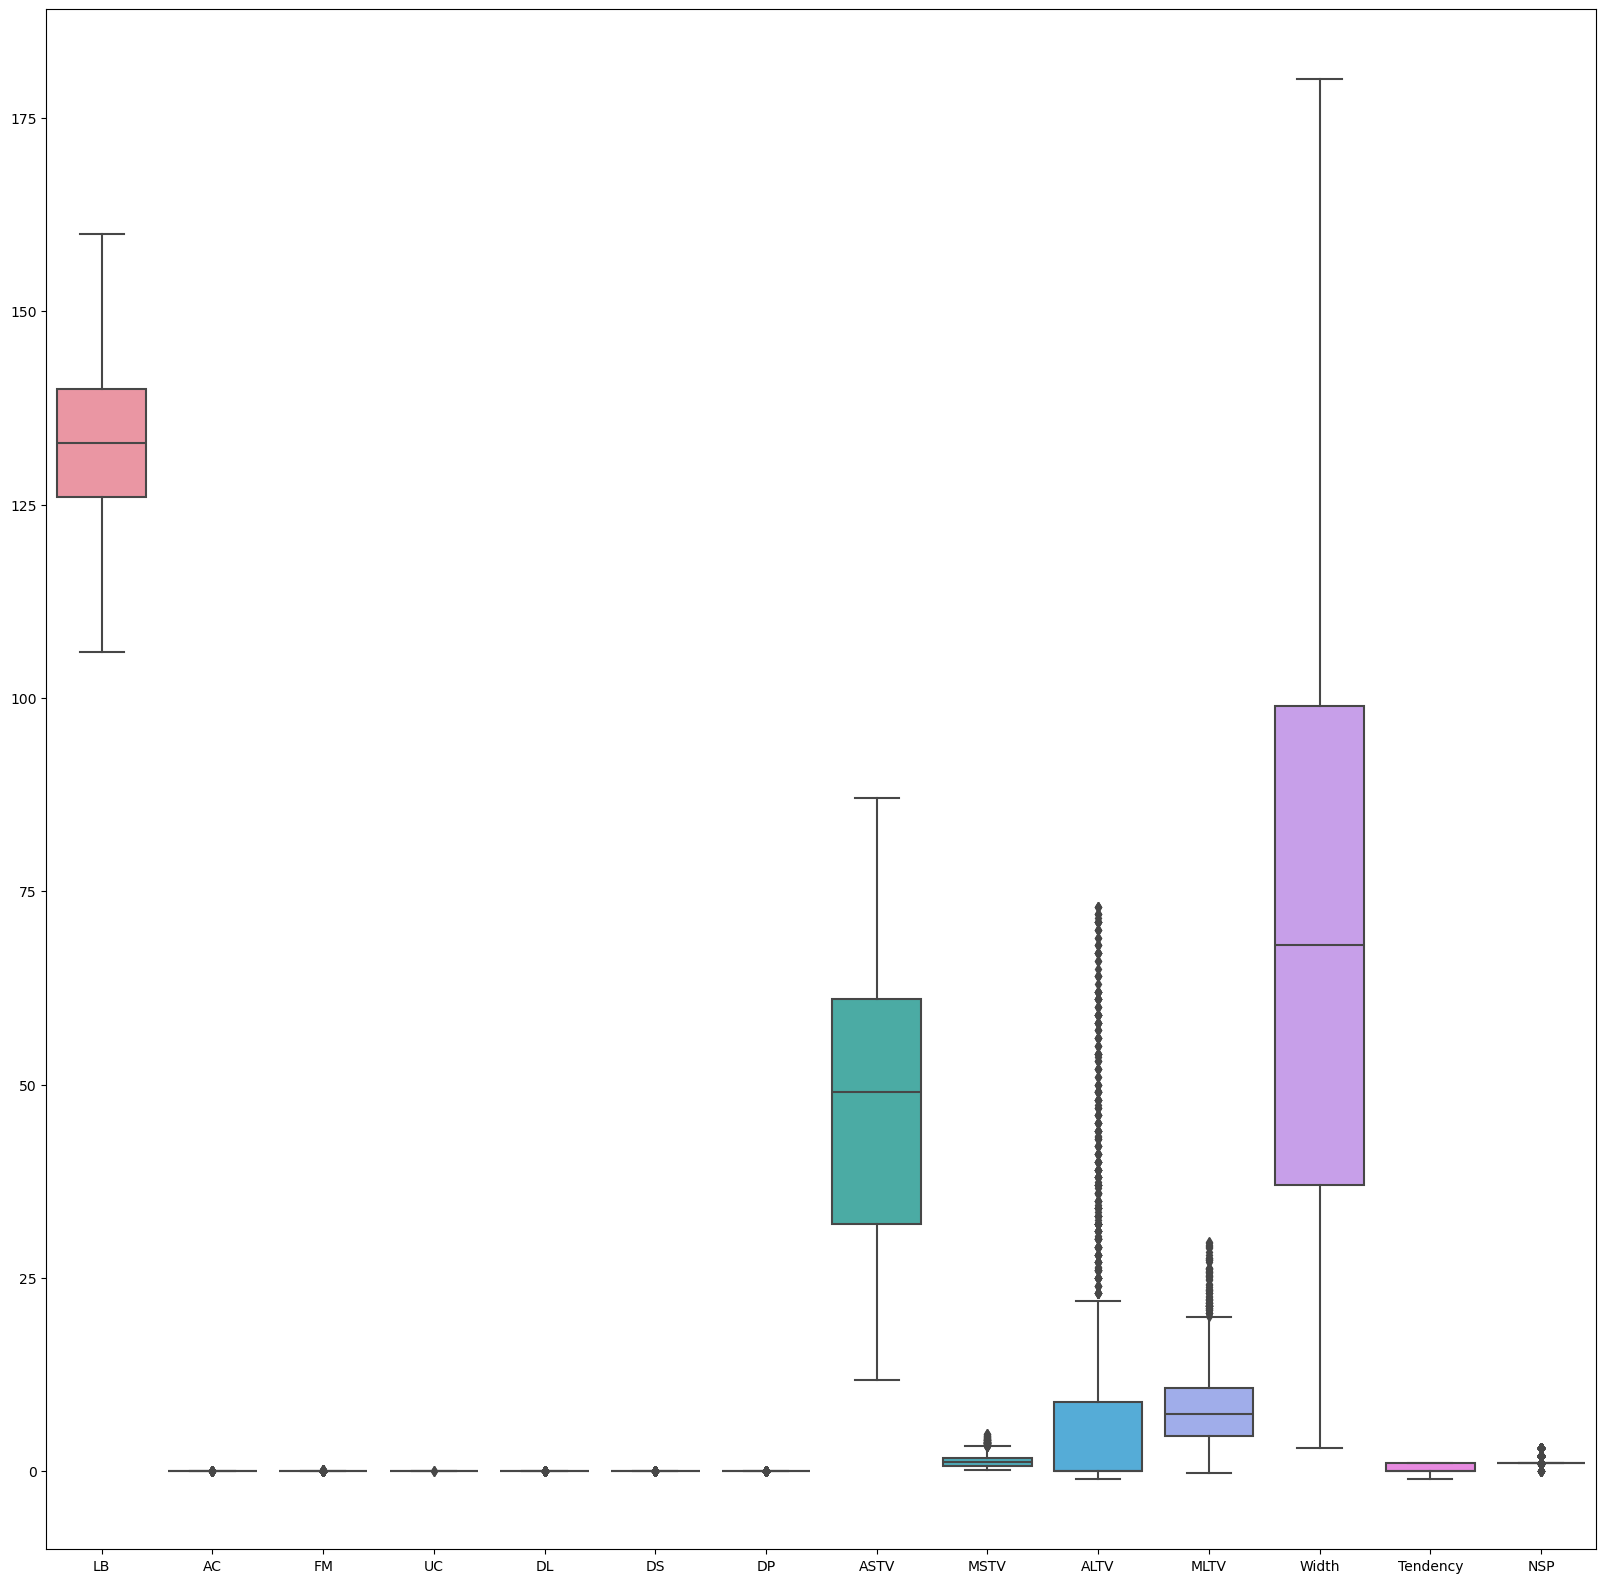

In [5]:
# 3.	Data Visualization:
    

# box-plot

import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=ax)



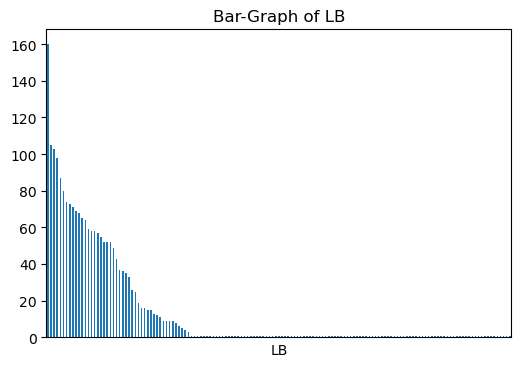

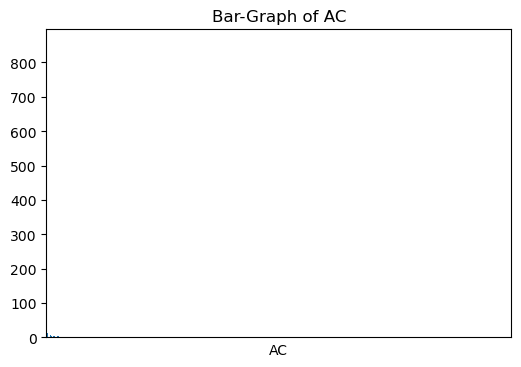

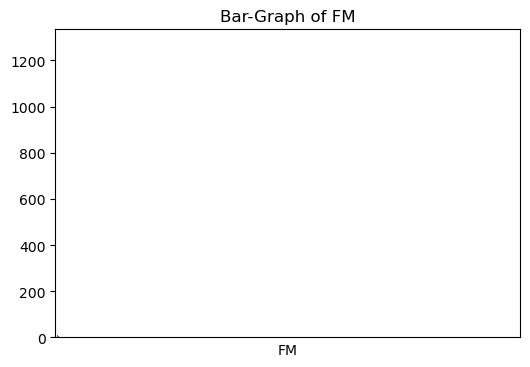

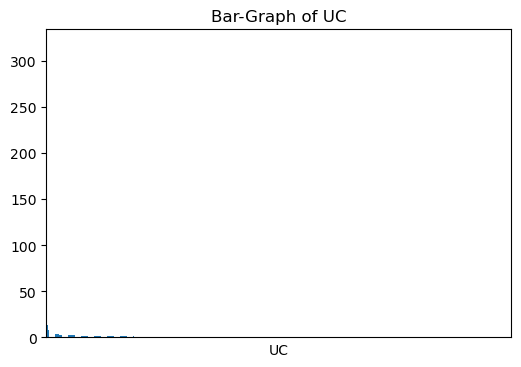

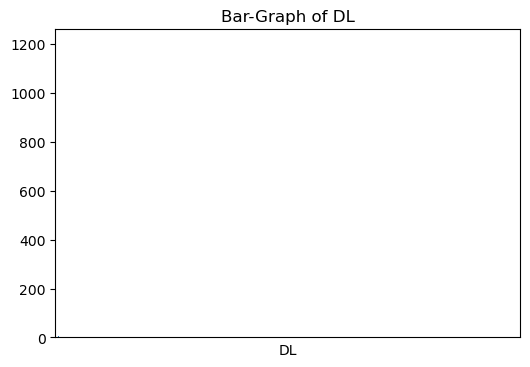

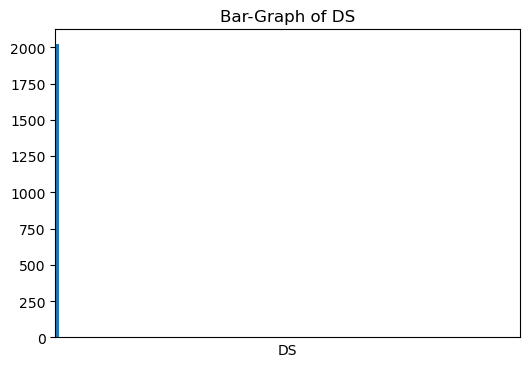

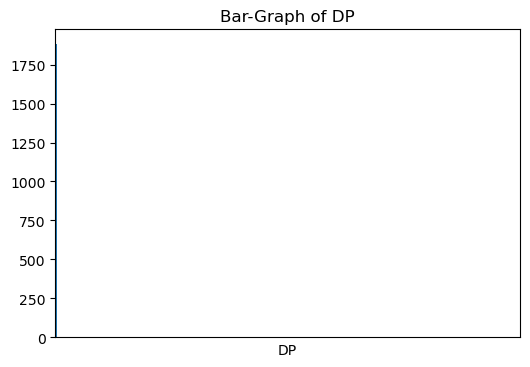

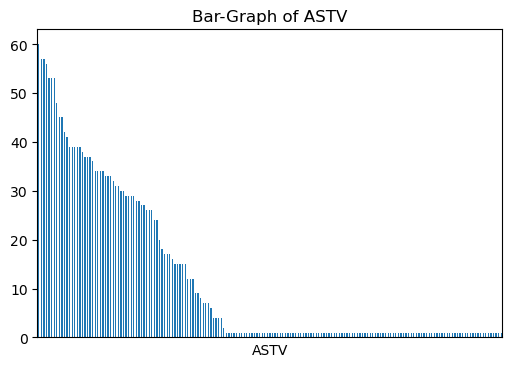

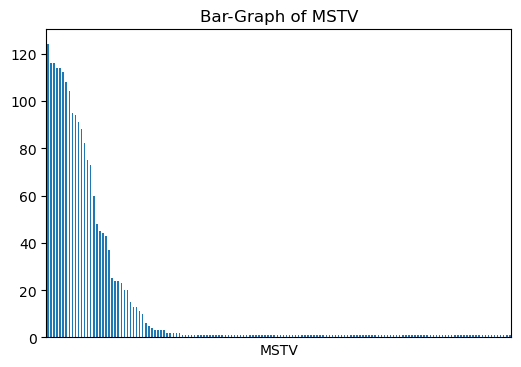

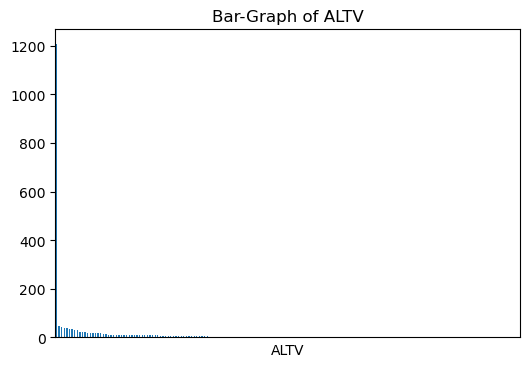

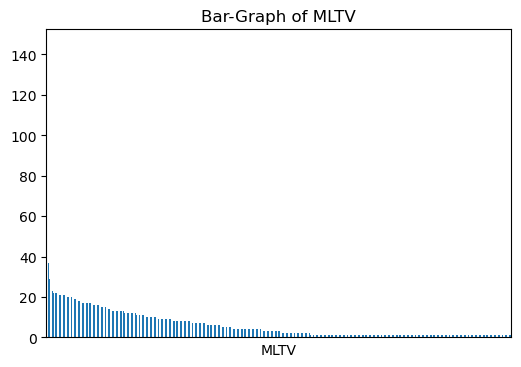

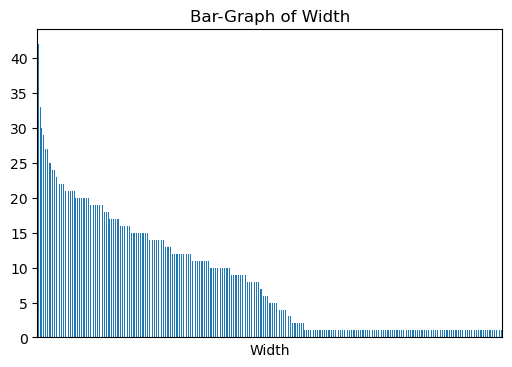

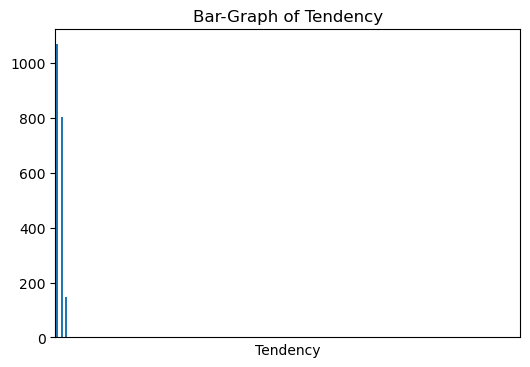

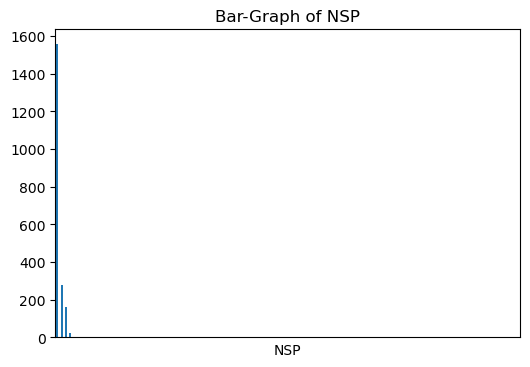

LB          0.008860
AC          1.167595
FM          6.278068
UC          0.140197
DL          1.564180
DS          0.000000
DP          4.049494
ASTV       -0.014592
MSTV        1.108475
ALTV        2.132281
MLTV        0.911015
Width       0.318156
Tendency   -0.293241
NSP         1.719324
dtype: float64

In [6]:

# Bar-Graph

import seaborn as sns
for i in df:
    # plot dimension are 15X7
    plt.figure(figsize=(6,4))
    # counting the individual element how many times it is repeating and ploting 
    # sns.distplot(df[i])
    # `distplot` is a deprecated function and will be removed in seaborn v0.14.0.
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Bar-Graph of {i}')
    # Hide x-axis labels
    plt.xticks([])
    plt.show()
    
    
df.skew()

In [7]:
# correclation

# knowing which two variable pairs having highest correclation
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.082075,-0.029722,-0.152717,-0.150724,0.020966,-0.125710,0.304295,-0.303027,0.301408,-0.045938,-0.142798,0.293593,0.150374
AC,-0.082075,1.000000,0.150760,0.096596,-0.092233,0.015559,-0.117685,-0.271503,0.207477,-0.360772,-0.118693,0.292192,0.030516,-0.338811
FM,-0.029722,0.150760,1.000000,-0.162215,-0.005292,-0.008232,-0.024292,-0.043774,0.179755,-0.062911,0.019704,0.191637,0.046125,-0.033542
UC,-0.152717,0.096596,-0.162215,1.000000,0.274472,0.030305,0.173374,-0.226521,0.284177,-0.262283,-0.068927,0.142722,-0.078843,-0.207903
DL,-0.150724,-0.092233,-0.005292,0.274472,1.000000,-0.003829,0.298672,-0.116451,0.521670,-0.259374,-0.198822,0.498065,0.033378,0.017525
DS,0.020966,0.015559,-0.008232,0.030305,-0.003829,1.000000,0.038188,0.026068,0.018951,-0.025523,-0.014089,0.007211,-0.007117,0.038652
DP,-0.125710,-0.117685,-0.024292,0.173374,0.298672,0.038188,1.000000,0.031219,0.278875,-0.127764,-0.185662,0.251025,-0.142201,0.367436
ASTV,0.304295,-0.271503,-0.043774,-0.226521,-0.116451,0.026068,0.031219,1.000000,-0.426375,0.405074,-0.314898,-0.255997,-0.006352,0.466114
MSTV,-0.303027,0.207477,0.179755,0.284177,0.521670,0.018951,0.278875,-0.426375,1.000000,-0.469293,0.021356,0.644339,-0.069543,-0.129393
ALTV,0.301408,-0.360772,-0.062911,-0.262283,-0.259374,-0.025523,-0.127764,0.405074,-0.469293,1.000000,-0.127391,-0.406287,0.046482,0.296513


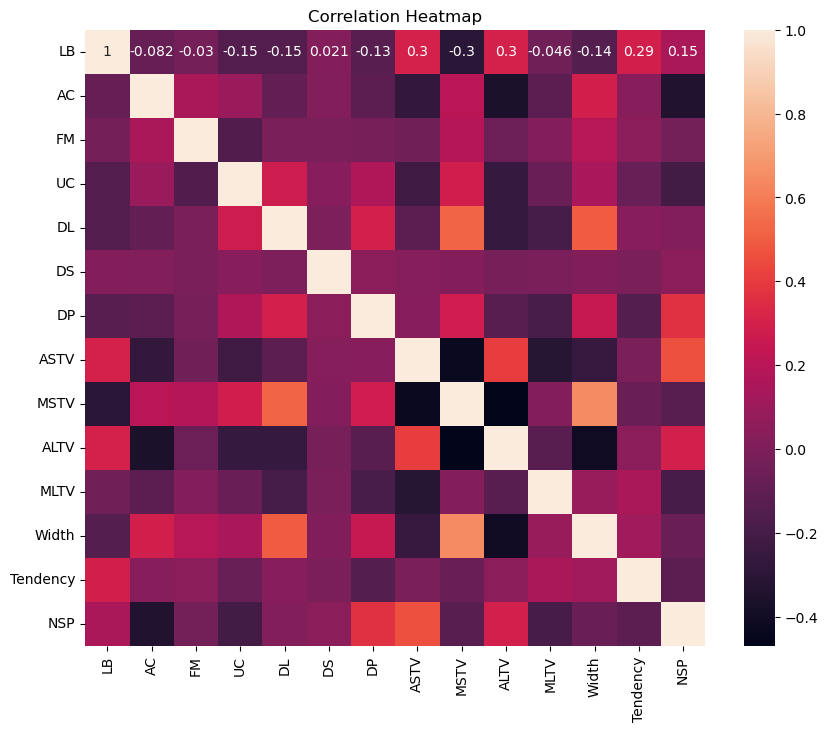

In [8]:

# from the table MSTV vs Width are having highest correclation
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()



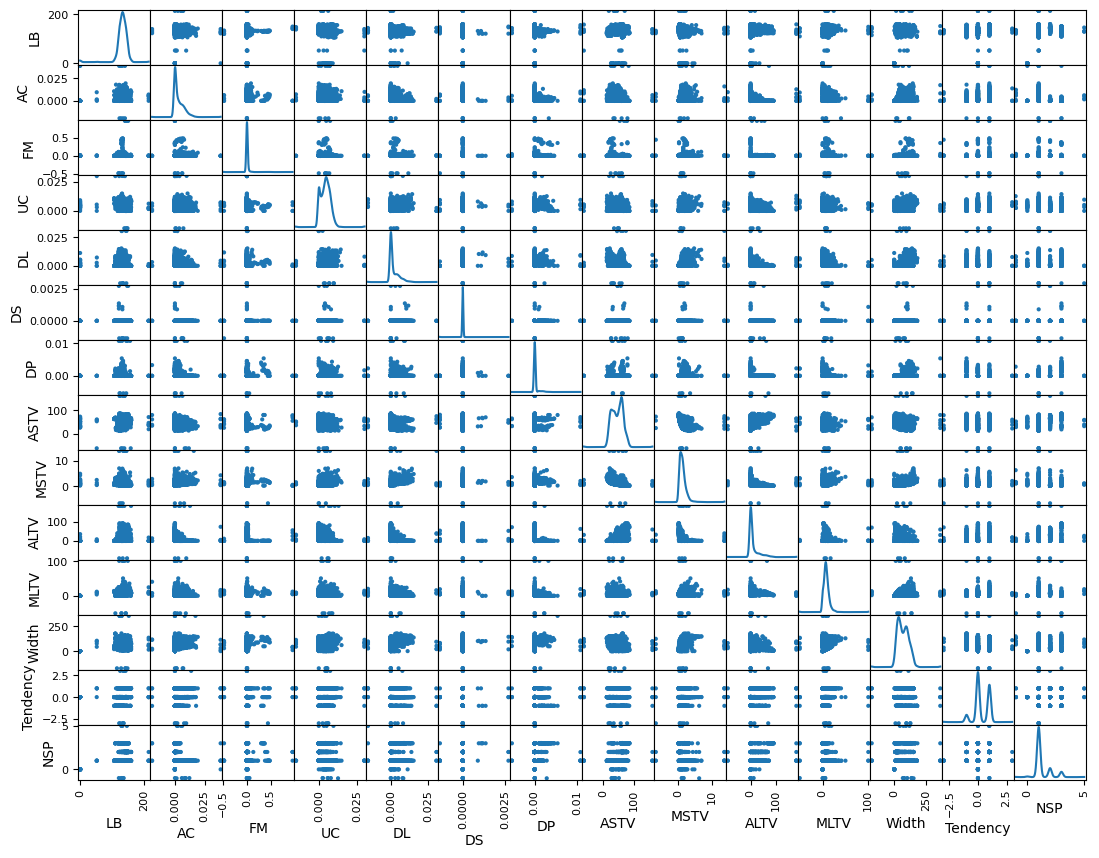

In [4]:

# pair plots


import seaborn as sns
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, alpha=1, figsize=(13, 10), diagonal='kde')
plt.show()


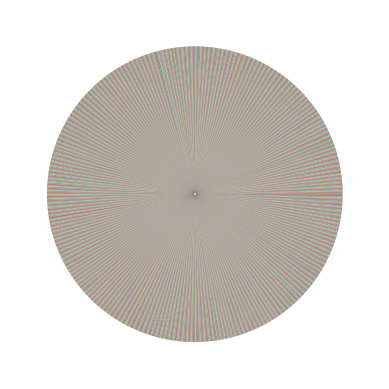

ValueError: Wedge sizes 'x' must be non negative values

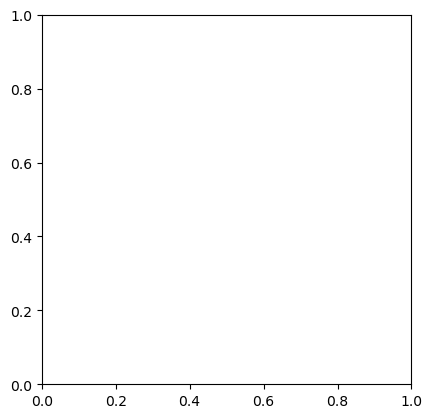

In [7]:
for i in df:
    plt.pie(df[i])
    plt.show() 


## Conclusion

In [11]:
# 5.	Conclusion:
    

# while exploring data we found that some of cell are empty so first we gone replced with 0
# from the correlation Heatmap we came to know MSTV and Width having high corr value and we can drop 'LB','ASTV','ALTV'
# and the pair plot between 'm'  and 'Width ' are in positive relation
    